# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Efendy]
- **Email:** [efendy.efendy77@gmail.com]
- **ID Dicoding:** [yusuke]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola penggunaan sepeda berdasarkan musim dan hari kerja/non-hari kerja?
- Pertanyaan 2 : Faktor lingkungan apa saja (cuaca, suhu, kecepatan udara, kelembaban) yang paling mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Ganti dengan path file di Google Drive Anda
file_path = '/content/drive/My Drive/day.csv'




Mounted at /content/drive


### Gathering Data

In [ ]:
data = pd.read_csv(file_path)

data.head(500)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,2012-05-10,2,1,5,0,4,1,1,0.505833,0.491783,0.552083,0.314063,1026,5546,6572
496,497,2012-05-11,2,1,5,0,5,1,1,0.533333,0.520833,0.360417,0.236937,1319,5711,7030
497,498,2012-05-12,2,1,5,0,6,0,1,0.564167,0.544817,0.480417,0.123133,2622,4807,7429
498,499,2012-05-13,2,1,5,0,0,0,1,0.612500,0.585238,0.576250,0.225117,2172,3946,6118


**Insight:**
- Dataset berisi informasi penyewaan sepeda dari tahun 2011-2012
- Data terdiri dari 500 baris dan 16 kolom

### Assessing Data

In [ ]:
# Informasi tentang kolom dataset
data.info()

# Melihat nilai yang hilang
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Semua kolom memiliki jumlah entri yang sama (731) dan tidak ada missing value.
- Kolom numerik seperti temp, atemp, hum, windspeed, dan cnt sudah bertipe data yang sesuai (float64 atau int64).
- Kolom dteday adalah kolom tanggal, yang bisa diubah ke tipe data datetime untuk mempermudah analisis berbasis waktu (seperti tren musiman atau tahunan).

### Cleaning Data

In [ ]:
# Ubah kolom dteday ke format datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Cek apakah konversi berhasil
print(data['dteday'].head())


0   2011-01-01
1   2011-01-02
2   2011-01-03
3   2011-01-04
4   2011-01-05
Name: dteday, dtype: datetime64[ns]


**Insight**:

- Kolom dteday telah diubah ke tipe data datetime

In [ ]:
# Cek apakah ada duplikasi di dataset
duplicate_rows = data[data.duplicated()]

# Tampilkan jumlah baris duplikat
print(f"Jumlah duplikat: {duplicate_rows.shape[0]}")


Jumlah duplikat: 0


**Insight**:

- Tidak ditemukan data duplikat dalam dataset

In [ ]:
# Cek nilai NaN di setiap kolom
missing_values = data.isnull().sum()

# Tampilkan jumlah nilai NaN
print("Jumlah nilai NaN di setiap kolom:")
print(missing_values)


Jumlah nilai NaN di setiap kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Semua kolom memiliki nilai lengkap tanpa adanya nilai NaN
- Semua kolom menunjukkan kesesuaian tipe data dengan isi yang ada

## Exploratory Data Analysis (EDA)

In [ ]:
# Ringkasan statistik untuk kolom numerik
data.describe()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight** :

Berdasarkan tabel deskripsi diatas, kita dapat melihat ada beberapa variabel yang dapat dianalisa seperti variabel waktu (holiday, weekday, workingday), variabel terkait cuaca (temp, atemp, hum, windspeed, casual) maupun variabel terkait jenis tipe customer (casual dan registered) dan variabel total pendapatan sewa.

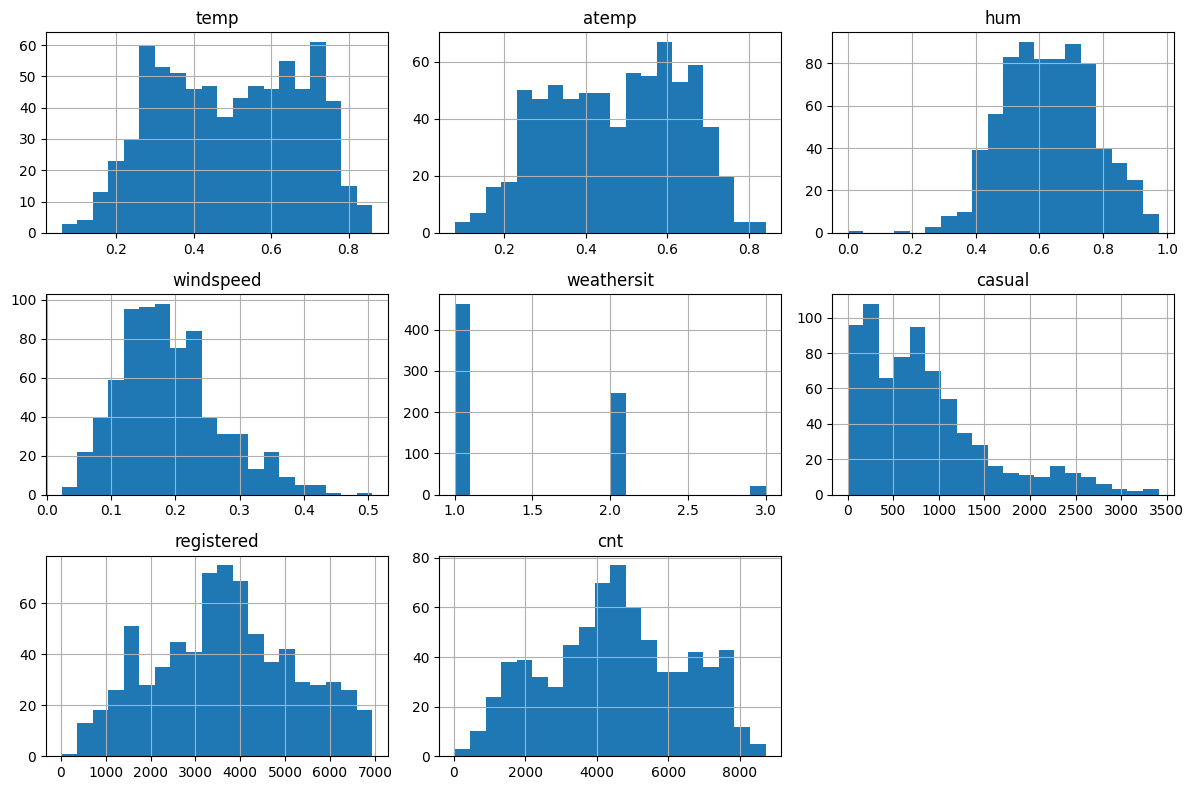

In [ ]:
# Plot histogram untuk beberapa kolom numerik
data[['temp', 'atemp','hum', 'windspeed', 'weathersit', 'casual', 'registered', 'cnt']].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


**Insight** :

Berdasarkan plot histogram diatas, nampak bahwa distribusi data normal pada windspeed, weathersit, registered dan cnt. Namun pada hum nampak condong sedikit miring kekanan dimana ada data ekstrem yang sangat kecil di kiri, yang artinya kebanyakan kelembapan tinggi dalam periode pengamatan. Dan pada windspeed nampak condong miring ke kiri dimana artinya mayoritas terjadi kecepatan angin rendah dalam periode yang diamati. Sedangkan pada weathersit, nampak bahwa dalam sebuah periode pengamatan kebanyakan yang terjadi adalah cuaca cerah. Dan untuk casual, nampak bahwa distribusi data condong ke kiri dimana berarti ada sedikit sekali pelanggan casual yang menyewa sepeda dalam jumlah yang banyak. Ini menunjukkan bahwa hanya sebagian kecil dari pelanggan casual yang menjadi pengguna sepeda secara intensif.


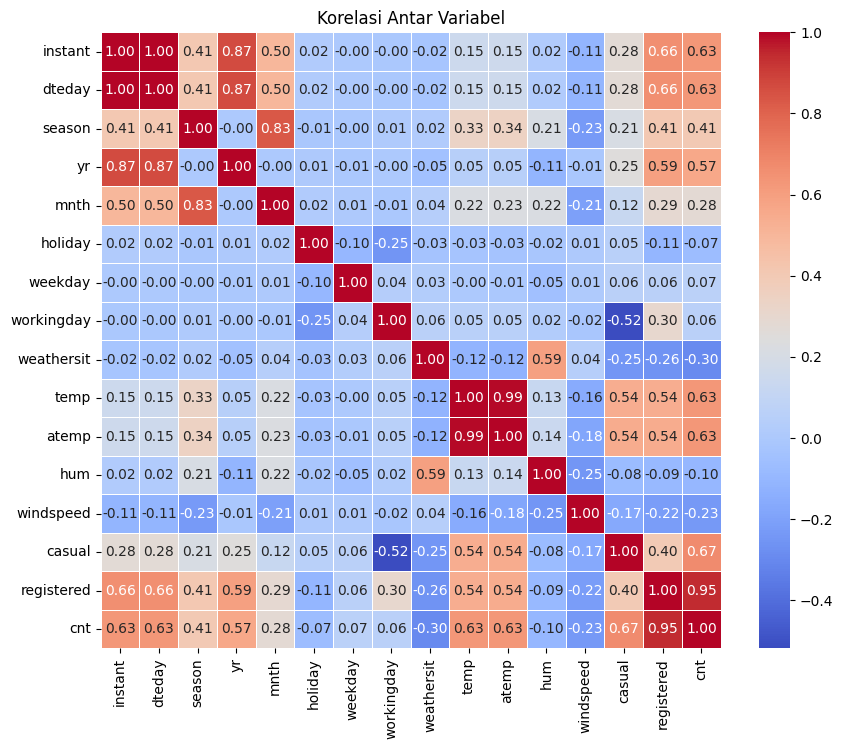

In [ ]:
# Menghitung korelasi antar variabel
correlation_matrix = data.corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Variabel')
plt.show()


**Insight** :

- Korelasi yang sangat kuat terjadi pada cnt dengan registered, sebesar 0.95
- Korelasi yang kuat terjadi pada cnt dengan casual, sebesar 0.67 ; dengan temp dan atemp sebesar 0.63
- Korelasi moderat terjadi pada cnt dengan season dan month, sebesar 0.41 dan 0.28
- Korelasi lemah terjadi pada cnt dengan windspeed (-0.23), hum (-0.10), weathersit (-0.30)
- Korelasi sangat lemah terjadi pada cnt dengan workingday (0.06), weekday (0.07), holiday (-0.07)

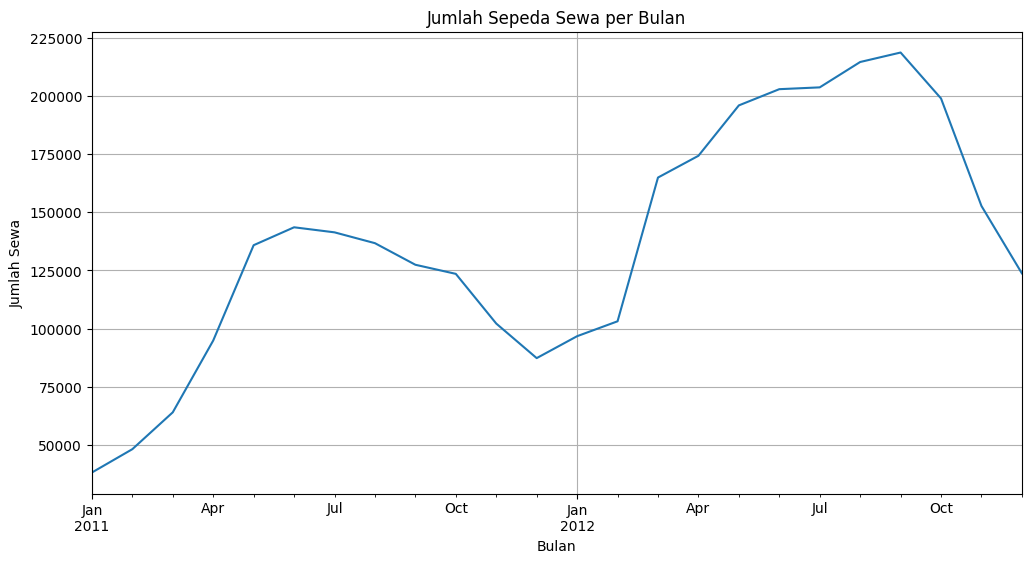

In [ ]:
# Menambahkan kolom bulan dan tahun untuk analisis waktu
data['year_month'] = data['dteday'].dt.to_period('M')

# Menampilkan jumlah sepeda sewa per bulan
monthly_rentals = data.groupby('year_month')['cnt'].sum()

# Visualisasi tren sepeda yang disewa per bulan
monthly_rentals.plot(figsize=(12, 6), title='Jumlah Sepeda Sewa per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sewa')
plt.grid(True)
plt.show()



**Insight** :

- Jumlah sewa di tahun 2011 cenderung meningkat di bulan maret hingga mei, dimana terjadi musim semi dengan suhu hangat. Tingginya jumlah sewa tetap bertahan hingga bulan oktober, dimana terjadi musim panas dengan cuaca yang cerah. Sedangkan di bulan november hingga januari 2012 terjadi penurunan seiring perubahan dari musim panas menjadi musim dingin. Dibulan februari 2012 jumlah sewa kembali meningkat seiring berakhirnya musim dingin. Dan pola tersebut berulang kembali seperti tahun 2011 yang mengalami peningkatan di bulan maret hingga oktober, dan kembali menurun di bulan november hingga desember.  
- Secara keseluruhan, jumlah sewa dari tahun 2011 ke 2012 mengalami trend peningkatan.

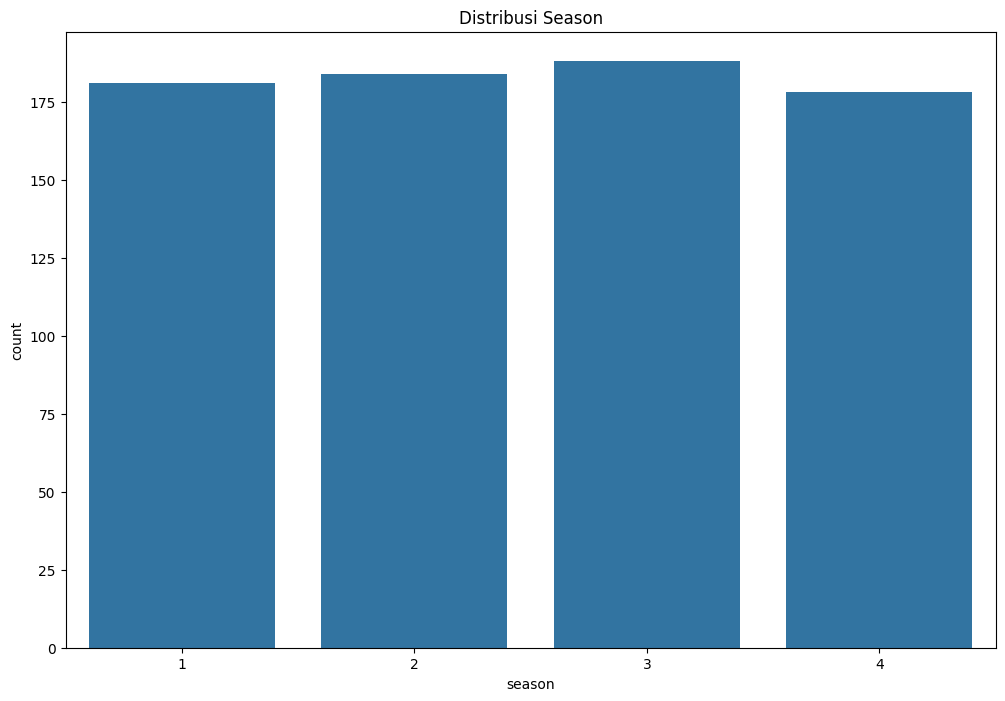

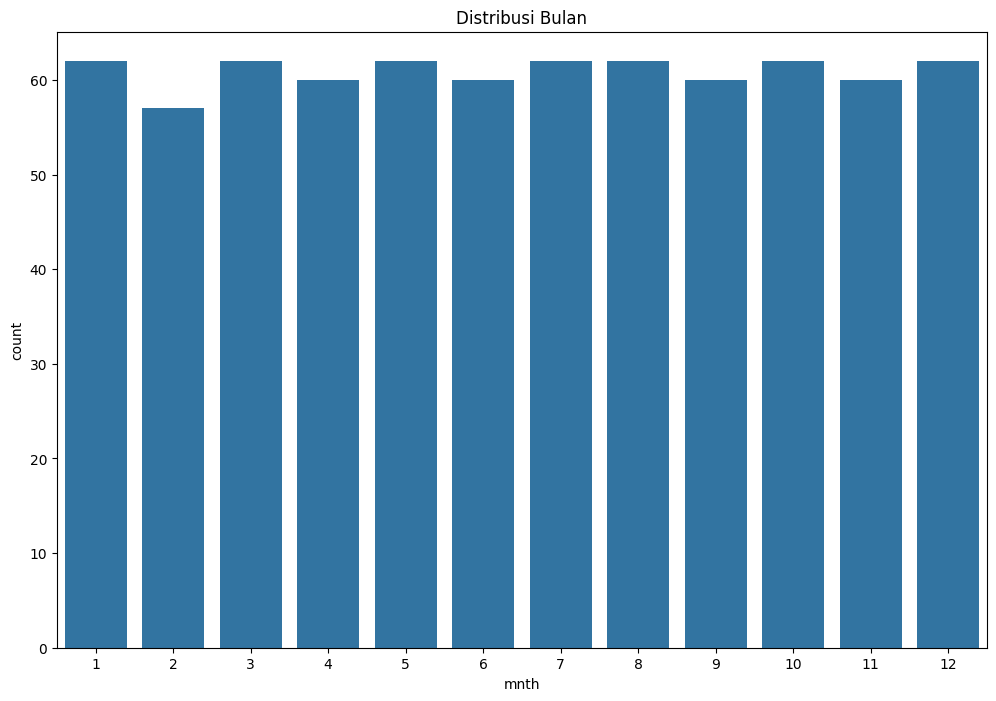

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='season')
plt.title('Distribusi Season')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='mnth')
plt.title('Distribusi Bulan')
plt.show()


**Insight** :

- Distribusi data berdasarkan musim dan bulan adalah merata, dimana tidak didapati adanya ketidakseimbangan distribusi data yang terlalu besar antar musim maupun antar bulan.

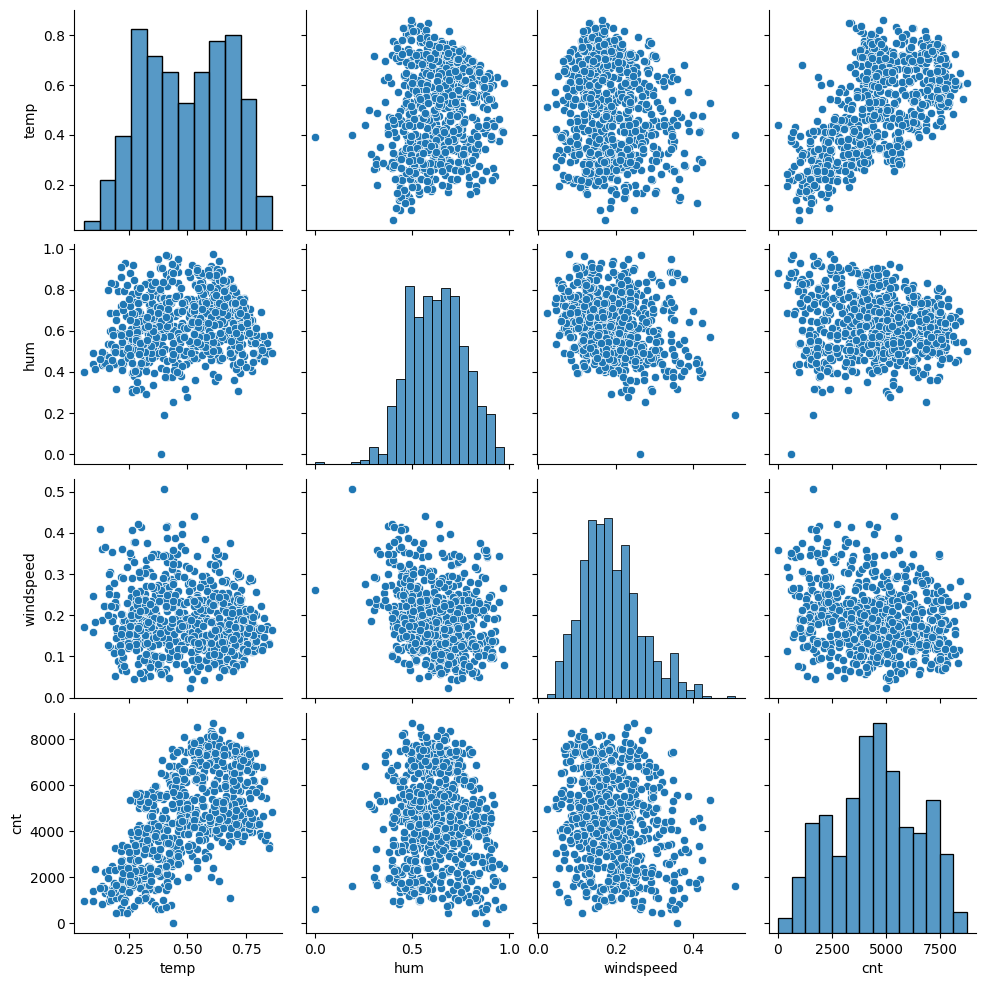

In [ ]:
sns.pairplot(data[['temp', 'hum', 'windspeed', 'cnt']])
plt.show()


**Insight** :
- Hanya temp dan cnt yang terlihat memiliki korelasi yang kuat saja. Korelasi temp dan cnt adalah korelasi positif, dimana semakin panas cuaca maka semakin besar jumlah sewa sepeda.

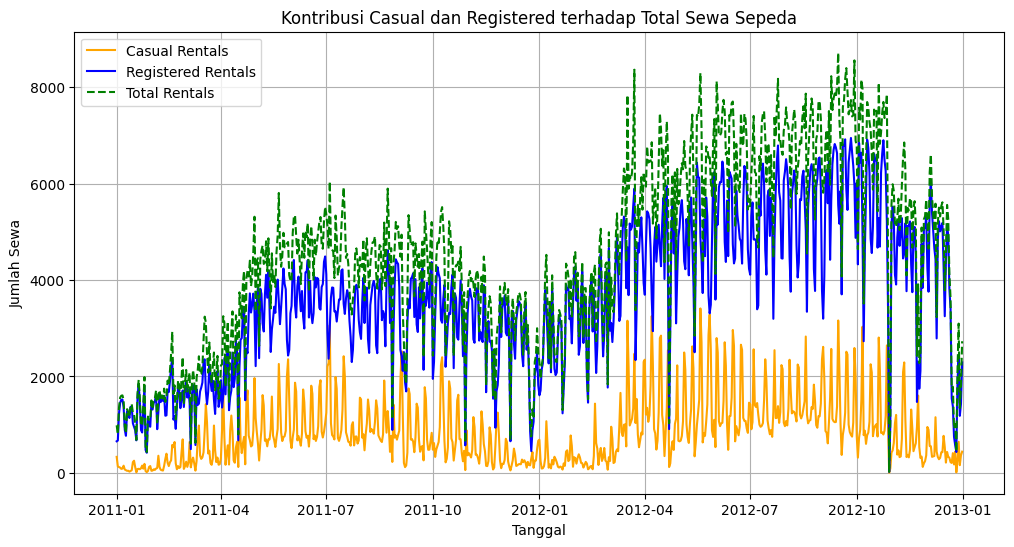

In [ ]:
# Visualisasi kontribusi casual dan registered terhadap cnt
plt.figure(figsize=(12, 6))

# Plot untuk casual dan registered
plt.plot(data['dteday'], data['casual'], label='Casual Rentals', color='orange')
plt.plot(data['dteday'], data['registered'], label='Registered Rentals', color='blue')

# Total sewa (cnt)
plt.plot(data['dteday'], data['cnt'], label='Total Rentals', color='green', linestyle='--')

plt.title('Kontribusi Casual dan Registered terhadap Total Sewa Sepeda')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sewa')
plt.legend()
plt.grid(True)
plt.show()


**Insight** :
- Nampak ada perbedaan tingkat sensitivitas antara casual rentals dengan registered rentals, dimana registered rentals lebih sensitif terhadap perubahan cuaca / musim daripada casual rentals.
- Karena kontribusi registered rentals jauh lebih besar daripada kontribusi casual rentals terhadap total rentals, maka sensitivitas total rentals menyerupai sensitivitas dari registered rentals.

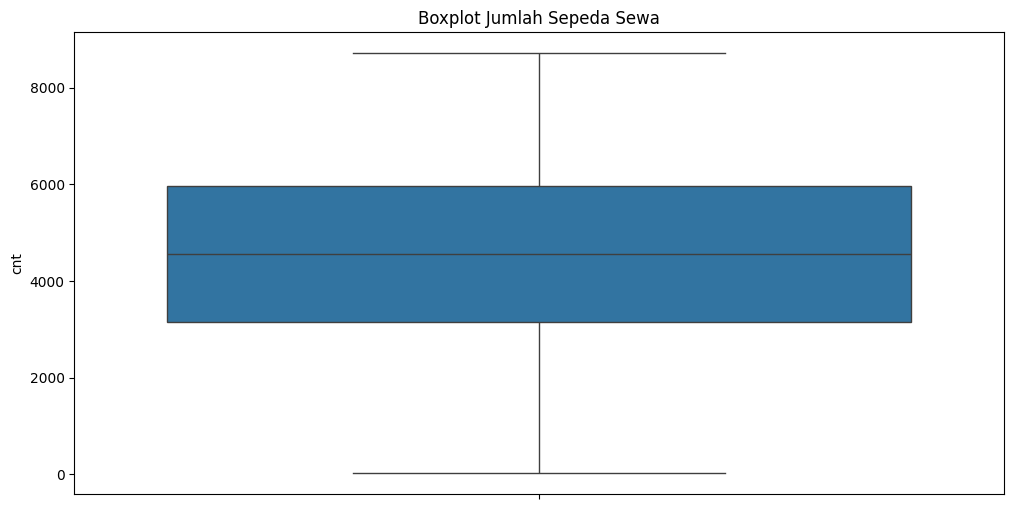

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data['cnt'])
plt.title('Boxplot Jumlah Sepeda Sewa')
plt.show()


**Insight** :

- Dari grafik boxplot nampak bahwa distribusi data jumlah sewa sepeda simestris.
- Tak ada outlier atau nilai ekstrem.

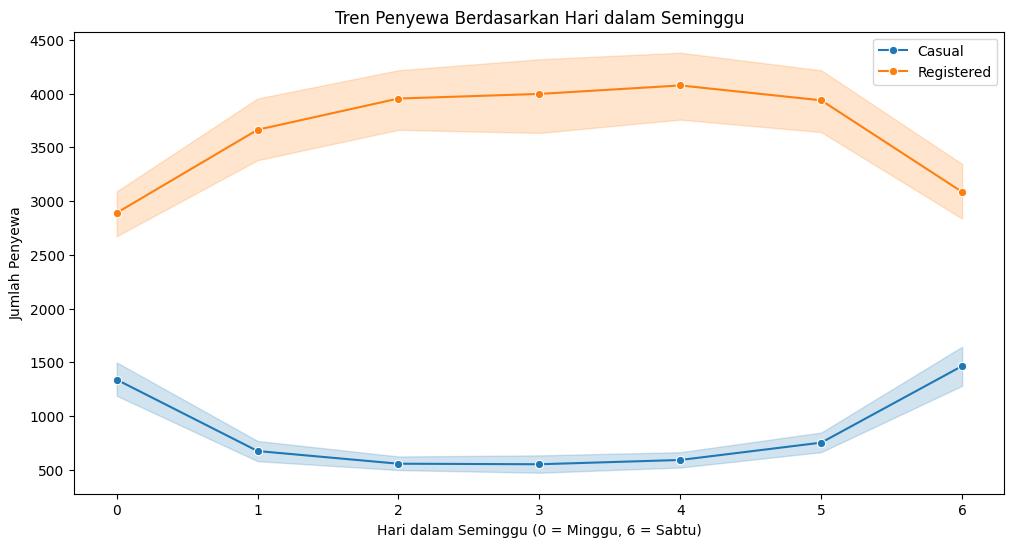

In [ ]:
# Tren penyewa casual dan registered berdasarkan weekday
plt.figure(figsize=(12, 6))
sns.lineplot(x="weekday", y="casual", data=data, label="Casual", marker="o")
sns.lineplot(x="weekday", y="registered", data=data, label="Registered", marker="o")
plt.title("Tren Penyewa Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)")
plt.ylabel("Jumlah Penyewa")
plt.legend()
plt.show()


**Insight** :

- Penyewa casual cenderung meningkat disaat hari sabtu dan minggu dimana merupakan hari non kerja, sebaliknya penyewa registered cenderung meningkat disaat hari senin - jumat dimana merupakan hari kerja.  

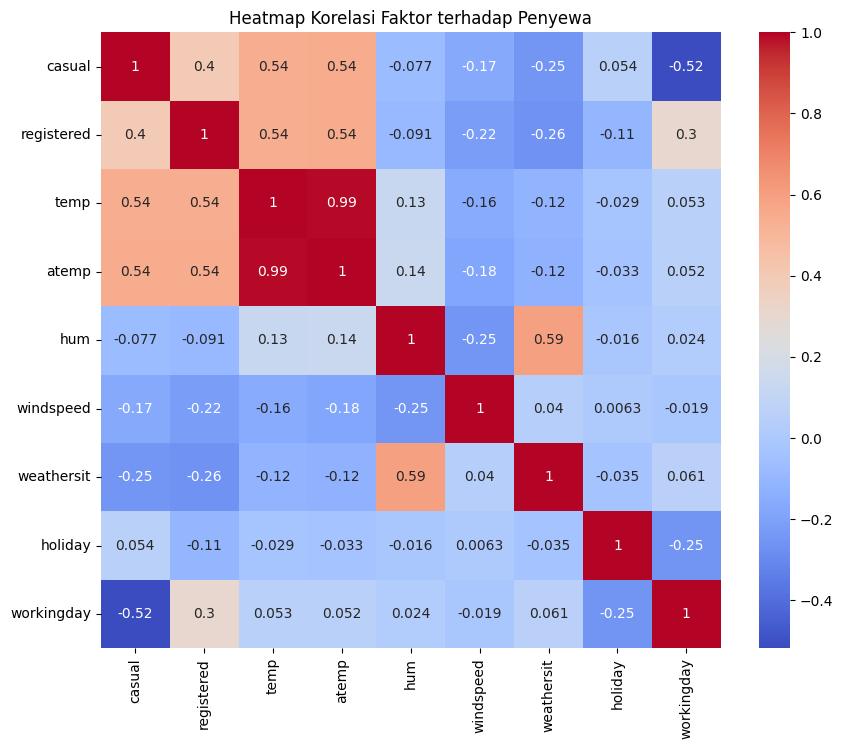

In [ ]:
# Heatmap untuk melihat korelasi
plt.figure(figsize=(10, 8))
correlation = data[["casual", "registered", "temp", "atemp",  "hum", "windspeed", "weathersit", "holiday", "workingday" ]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Faktor terhadap Penyewa")
plt.show()


**Insight** :

- Baik penyewa casual maupun registered sama-sama memiliki korelasi positif yang kuat terhadap temp maupun atemp (0.54).
- Penyewa casual memiliki korelasi negatif kuat terhadap workingday, sebaliknya penyewa registered memiliki korelasi positif. Sedangkan pada terhadap holiday, kedua penyewa tak terlalu berkorelasi (0.054 dan -0.11).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan musim dan hari kerja/non-hari kerja?

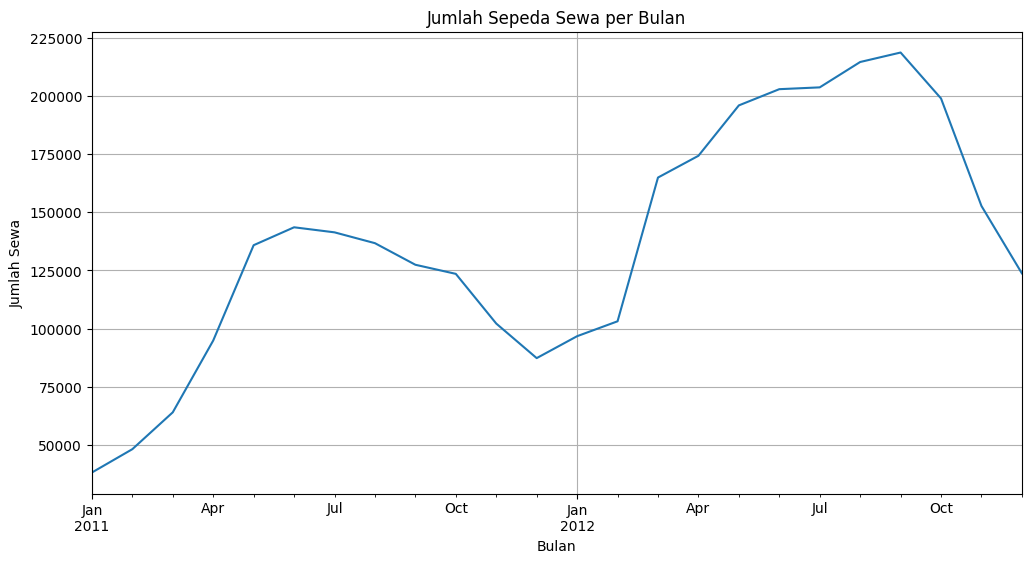

In [ ]:
# Visualisasi tren sepeda yang disewa per bulan
monthly_rentals.plot(figsize=(12, 6), title='Jumlah Sepeda Sewa per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sewa')
plt.grid(True)
plt.show()

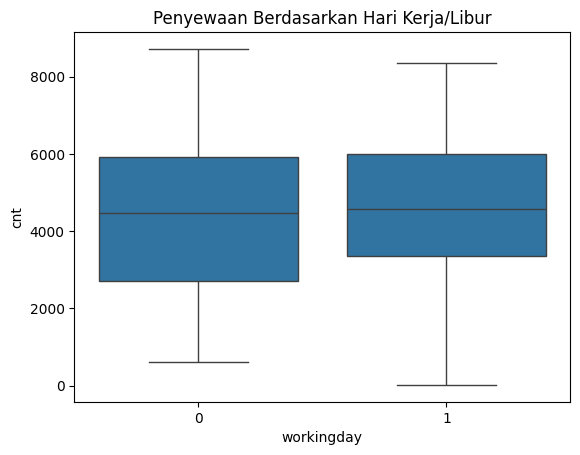

In [ ]:
sns.boxplot(x='workingday', y='cnt', data=data)
plt.title('Penyewaan Berdasarkan Hari Kerja/Libur')
plt.show()


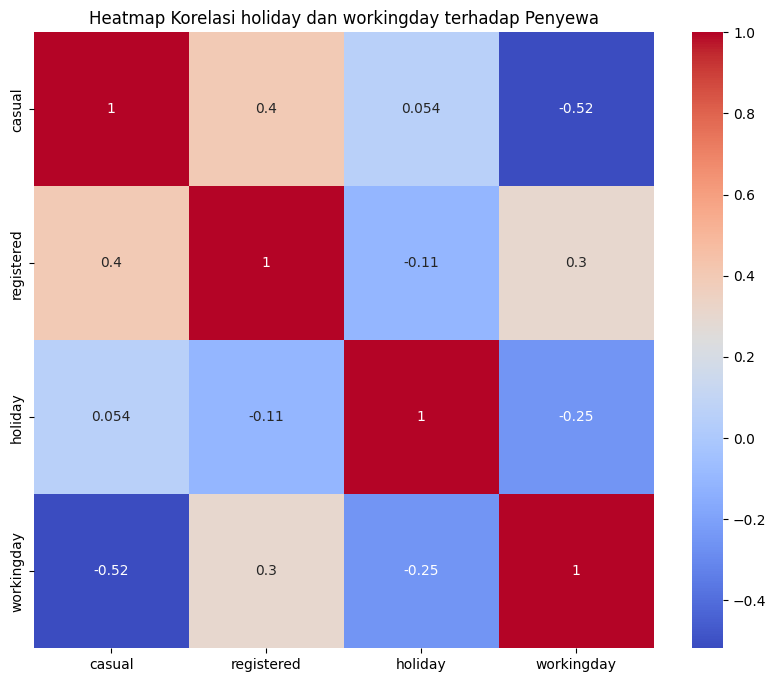

In [ ]:
# Heatmap untuk melihat korelasi
plt.figure(figsize=(10, 8))
correlation = data[["casual", "registered", "holiday", "workingday" ]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi holiday dan workingday terhadap Penyewa")
plt.show()

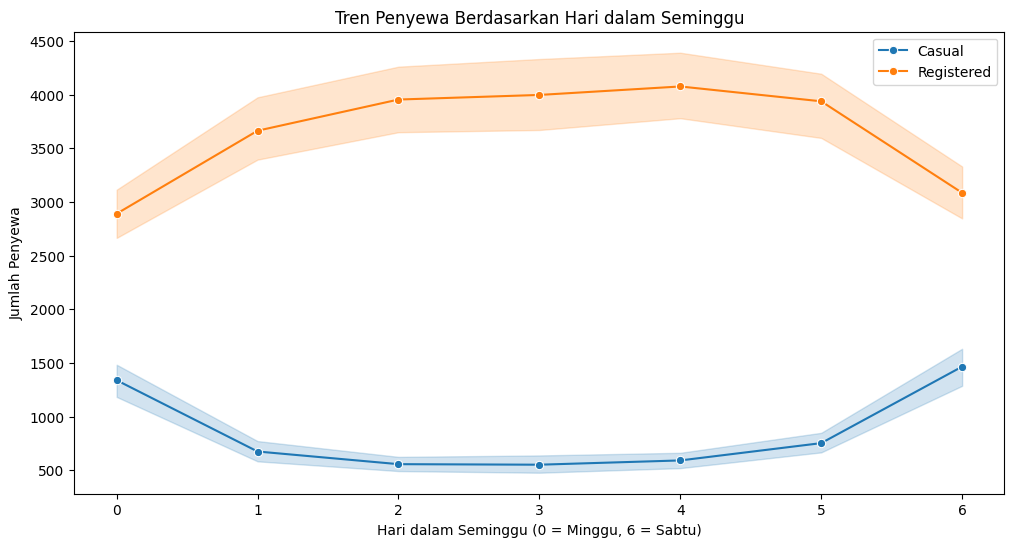

In [ ]:
# Tren penyewa casual dan registered berdasarkan weekday
plt.figure(figsize=(12, 6))
sns.lineplot(x="weekday", y="casual", data=data, label="Casual", marker="o")
sns.lineplot(x="weekday", y="registered", data=data, label="Registered", marker="o")
plt.title("Tren Penyewa Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)")
plt.ylabel("Jumlah Penyewa")
plt.legend()
plt.show()

**Insight** :

- Pada grafik pertama, nampak bahwa jumlah sewa di tahun 2011 cenderung meningkat di bulan maret hingga mei, dimana terjadi musim semi dengan suhu hangat. Tingginya jumlah sewa tetap bertahan hingga bulan oktober, dimana terjadi musim panas dengan cuaca yang cerah. Sedangkan di bulan november hingga januari 2012 terjadi penurunan seiring perubahan dari musim panas menjadi musim dingin. Dibulan februari 2012 jumlah sewa kembali meningkat seiring berakhirnya musim dingin. Dan pola tersebut berulang kembali seperti tahun 2011 yang mengalami peningkatan di bulan maret hingga oktober, dan kembali menurun di bulan november hingga desember. Jadi nampak ada pola penyewaan sepeda meningkat disaat musim panas, sedangkan menurun disaat musim dingin.

- Pada grafik kedua (boxplot), nampak bahwa pola penggunaan sepeda baik pada hari kerja maupun hari libur tidak jauh berbeda. Meski demikian, di hari kerja menunjukkan penyewaan sepeda yang lebih stabil, mungkin karena digunakan untuk aktivitas rutin seperti pergi bekerja atau sekolah. Namun pada hari libur, ada kecenderungan lebih banyak variasi penyewaan sepeda. Adanya variasi penyewaan sepeda, mungkin bisa dijelaskan oleh heatmap korelasi (grafis ketiga) dan grafik keempat, dimana ada korelasi negatif cukup kuat antara workingday dengan penyewa casual, yang artinya ada peningkatan penyewaan oleh casual di hari libur.

### Pertanyaan 2: Faktor lingkungan apa saja (cuaca, suhu, kecepatan udara, kelembaban) yang paling mempengaruhi jumlah penyewaan sepeda?

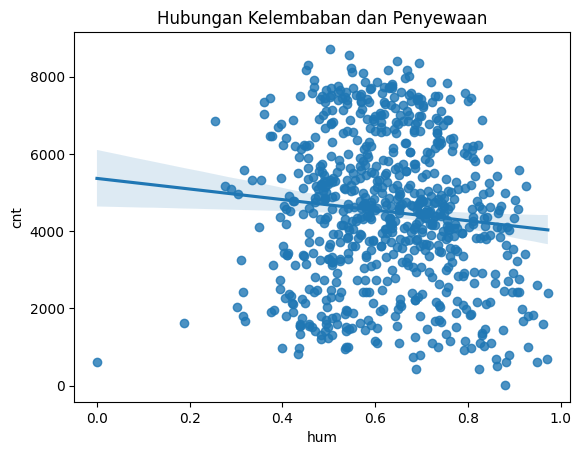

In [ ]:
sns.regplot(x='hum', y='cnt', data=data)
plt.title('Hubungan Kelembaban dan Penyewaan')
plt.show()


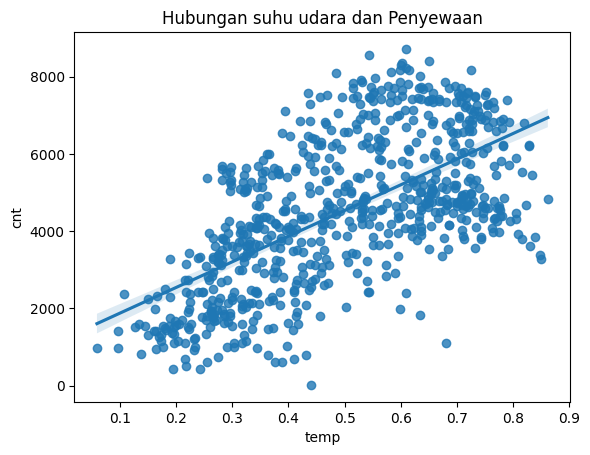

In [ ]:
sns.regplot(x='temp', y='cnt', data=data)
plt.title('Hubungan suhu udara dan Penyewaan')
plt.show()


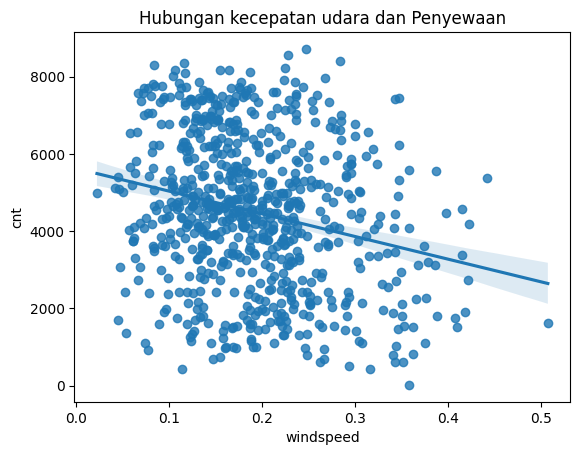

In [ ]:
sns.regplot(x='windspeed', y='cnt', data=data)
plt.title('Hubungan kecepatan udara dan Penyewaan')
plt.show()


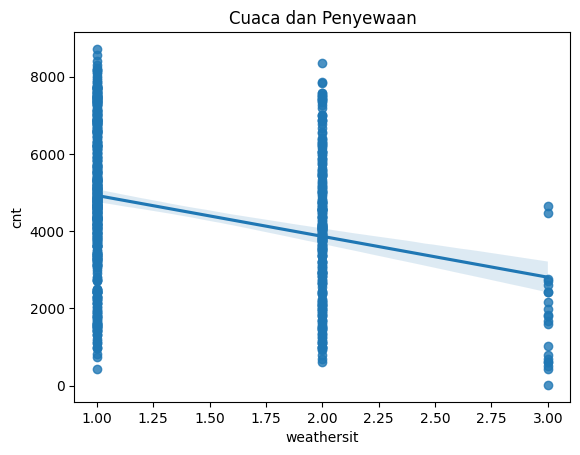

In [ ]:
sns.regplot(x='weathersit', y='cnt', data=data)
plt.title('Cuaca dan Penyewaan')
plt.show()


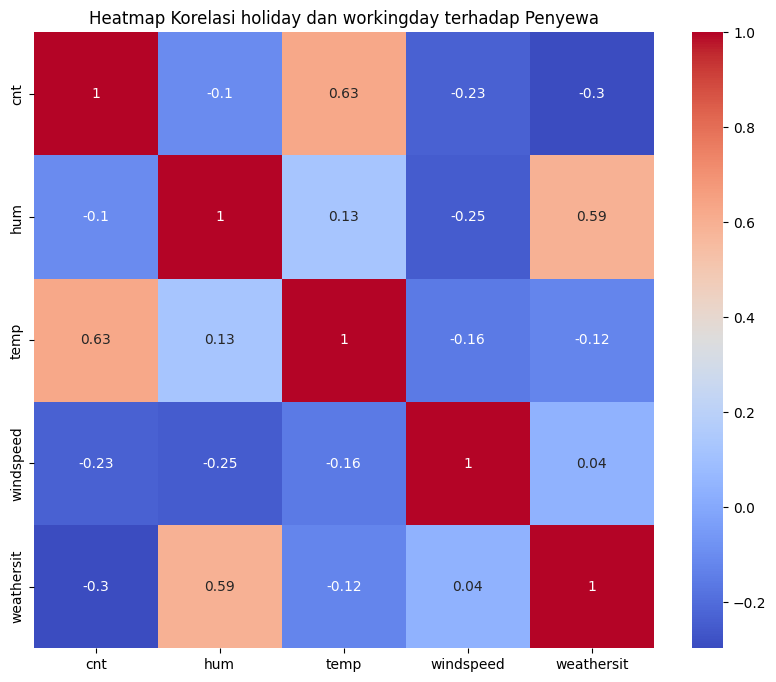

In [ ]:
# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
correlation = data[["cnt", "hum", "temp", "windspeed", "weathersit" ]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi holiday dan workingday terhadap Penyewa")
plt.show()

**Insight:**

- Kelembapan (humidity) memiliki korelasi negatif yang lemah
- Suhu udara (temp) memiliki korelasi positif yang kuat
- kecepatan udara (windspeed) memiliki korelasi negatif yang lemah
- Cuaca (Weathersit) memiliki korelasi negatif moderat

## Conclusion

Conclution pertanyaan 1 :

- Di tahun 2011 maupun 2012 nampak adanya lonjakan yang terjadi pada bulan-bulan yang lebih hangat. Ini memberikan indikasi bahwa adanya pola penggunaan sepeda berdasarkan musim. Hal ini didukung oleh data yang menunjukkan bahwa faktor musim (season) juga berpengaruh terhadap pendapatan sewa. Hal ini menunjukkan pada musim tertentu (kemungkinan musim panas atau semi) penyewaan sepeda meningkat. Sebaliknya pada musim yang dingin akan menurunkan pendapatan sewa sepeda.

- Penyewaan pada hari kerja maupun pada hari libur tidaklah terlalu berbeda. Namun ada perbedaan antara casual dengan register, dimana semakin banyak jumlah hari kerja dalam suatu periode maka semakin jarang penyewa casual dalam menyewa sepeda. Sebaliknya, bagi penyewa register malah semakin meningkatkan sewa sepedanya (meski korelasinya hanya moderat). Meskipun bagi penyewa casual ada pengaruhnya, namun karena konstribusi penyewa casual terhadap total pendapatan sewa relatif kecil maka secara total tidaklah terlalu berpengaruh.


Conclution pertanyaan 2 :

- Suhu udara tetap menjadi faktor yang berpengaruh terbesar bagi penyewa sepeda, baik bagi penyewa casual maupun register.